In [272]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows', 40000)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [47]:
df=pd.read_csv('features updated.csv')

C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Unnamed: 0,Name,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,...,Unnamed: 68,Unnamed: 69,AirBags,Unnamed: 71,ABS,Unnamed: 73,Company,Model Name,Unnamed: 76,Unnamed: 77
0,Adam Revo 1051cc,Adam Revo 1051cc 2006,210000.0,2006.0,100000.0,Karachi,Petrol,1000 cc,Manual,Orange,...,NaN,NaN,NaN,NaN,NaN,NaN,Adam,Revo 1051cc,NaN,NaN
1,Adam Revo,Adam Revo 2006,290000.0,2006.0,58000.0,Karachi,NaN,800 cc,Manual,Red,...,NaN,NaN,NaN,NaN,NaN,NaN,Adam,Revo,NaN,NaN
2,Adam Zabardast,Adam Zabardast 2009,1000000.0,2009.0,300000.0,Karachi,Diesel,3000 cc,Manual,Yellow,...,NaN,NaN,NaN,NaN,NaN,NaN,Adam,Zabardast,NaN,NaN
3,Audi A1,Audi A1 2012,4500000.0,2012.0,36000.0,Hyderabad,Petrol,1000 cc,Manual,Silver,...,NaN,NaN,AirBags,NaN,NaN,NaN,Audi,A1,NaN,NaN
4,Audi A3 1.2 TFSI,Audi A3 1.2 TFSI 2015,4495000.0,2015.0,5599.0,Lahore,Petrol,1200 cc,Automatic,Silver,...,NaN,NaN,AirBags,NaN,ABS,NaN,Audi,A3 1.2 TFSI,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54480,Volkswagen Up,Volkswagen Up 2015,1550000.0,2015.0,32000.0,Lahore,Petrol,1000 cc,Automatic,Silver,...,NaN,NaN,AirBags,NaN,ABS,NaN,Volkswagen,Up,NaN,NaN
54481,Volkswagen Up,Volkswagen Up 2016,2349000.0,2016.0,27800.0,Lahore,Petrol,1000 cc,Automatic,Silver,...,NaN,NaN,AirBags,NaN,ABS,NaN,Volkswagen,Up,NaN,NaN
54482,Volvo S40 Kinetic,Volvo S40 Kinetic 1998,1275000.0,1998.0,145000.0,Islamabad,Petrol,1600 cc,Automatic,Blue,...,NaN,NaN,NaN,NaN,NaN,NaN,Volvo,S40 Kinetic,NaN,NaN
54483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN


In [48]:
df2=df[['Price','Model Year','Mileage','Registered City','Engine Type','Engine Capacity','Transmission','Color',
       'Assembly','Company','Model Name','Features']]

# Filled The Null Values

In [49]:
idata=df2.dropna()

idata[['CruiseControl','AirBags','AirConditioning','AlloyRims','PowerLocks',
       'PowerSteering','PowerWindows','SunRoof','PowerMirrors','ImmobilizerKey','ABS']]= df[['CruiseControl','AirBags','AirConditioning','AlloyRims','PowerLocks',
       'PowerSteering','PowerWindows','SunRoof','PowerMirrors','ImmobilizerKey','ABS']]

data=idata.fillna(0)
data

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Company,...,AirBags,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS
2,1000000.0,2009.0,300000.0,Karachi,Diesel,3000 cc,Manual,Yellow,Local,Adam,...,0,AirConditioning,AlloyRims,PowerLocks,PowerSteering,0,0,PowerMirrors,ImmobilizerKey,0
3,4500000.0,2012.0,36000.0,Hyderabad,Petrol,1000 cc,Manual,Silver,Imported,Audi,...,AirBags,0,0,0,0,PowerWindows,0,PowerMirrors,0,0
4,4495000.0,2015.0,5599.0,Lahore,Petrol,1200 cc,Automatic,Silver,Imported,Audi,...,AirBags,AirConditioning,AlloyRims,PowerLocks,PowerSteering,0,0,PowerMirrors,ImmobilizerKey,ABS
5,5700000.0,2017.0,45000.0,Lahore,Petrol,1200 cc,Automatic,White,Local,Audi,...,AirBags,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS
6,5700000.0,2017.0,12000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,AirBags,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,0,PowerMirrors,ImmobilizerKey,ABS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,3000000.0,2013.0,78000.0,Islamabad,Petrol,1200 cc,Automatic,White,Imported,Volkswagen,...,AirBags,AirConditioning,AlloyRims,PowerLocks,PowerSteering,0,0,PowerMirrors,0,ABS
54478,2075000.0,2014.0,99000.0,Islamabad,Petrol,1000 cc,Automatic,Black,Imported,Volkswagen,...,AirBags,AirConditioning,AlloyRims,PowerLocks,PowerSteering,0,0,PowerMirrors,ImmobilizerKey,ABS
54479,2250000.0,2014.0,57000.0,Karachi,Petrol,1000 cc,Automatic,White,Imported,Volkswagen,...,AirBags,AirConditioning,0,PowerLocks,PowerSteering,PowerWindows,0,0,0,0
54480,1550000.0,2015.0,32000.0,Lahore,Petrol,1000 cc,Automatic,Silver,Imported,Volkswagen,...,AirBags,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,0,PowerMirrors,ImmobilizerKey,ABS


# Converting String Features To Numbers

In [50]:
data['Numeric RegCity'] = pd.factorize(data['Registered City'])[0]

In [7]:
data.head(100)

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Company,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,Numeric RegCity
2,1000000.0,2009.0,300000.0,Karachi,Diesel,3000 cc,Manual,Yellow,Local,Adam,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,0,0,PowerMirrors,ImmobilizerKey,0,0
3,4500000.0,2012.0,36000.0,Hyderabad,Petrol,1000 cc,Manual,Silver,Imported,Audi,...,0,0,0,0,PowerWindows,0,PowerMirrors,0,0,1
4,4495000.0,2015.0,5599.0,Lahore,Petrol,1200 cc,Automatic,Silver,Imported,Audi,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,0,0,PowerMirrors,ImmobilizerKey,ABS,2
5,5700000.0,2017.0,45000.0,Lahore,Petrol,1200 cc,Automatic,White,Local,Audi,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,2
6,5700000.0,2017.0,12000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,0,PowerMirrors,ImmobilizerKey,ABS,3
7,5700000.0,2017.0,20000.0,Lahore,Petrol,1200 cc,Automatic,Black,Local,Audi,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,2
8,6500000.0,2019.0,8000.0,Un-Registered,Petrol,1200 cc,Automatic,White,Imported,Audi,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,4
9,4750000.0,2015.0,42000.0,Karachi,Petrol,1200 cc,Automatic,Grey,Local,Audi,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,0,PowerMirrors,ImmobilizerKey,ABS,0
10,6100000.0,2016.0,85000.0,Karachi,Petrol,1200 cc,Automatic,Black,Imported,Audi,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,0
11,5400000.0,2016.0,30000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,AirConditioning,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,3


In [51]:
data['Numeric MName'] = pd.factorize(data['Model Name'])[0]

In [9]:
data.head(100)

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Company,...,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,Numeric RegCity,Numeric MName
2,1000000.0,2009.0,300000.0,Karachi,Diesel,3000 cc,Manual,Yellow,Local,Adam,...,AlloyRims,PowerLocks,PowerSteering,0,0,PowerMirrors,ImmobilizerKey,0,0,0
3,4500000.0,2012.0,36000.0,Hyderabad,Petrol,1000 cc,Manual,Silver,Imported,Audi,...,0,0,0,PowerWindows,0,PowerMirrors,0,0,1,1
4,4495000.0,2015.0,5599.0,Lahore,Petrol,1200 cc,Automatic,Silver,Imported,Audi,...,AlloyRims,PowerLocks,PowerSteering,0,0,PowerMirrors,ImmobilizerKey,ABS,2,2
5,5700000.0,2017.0,45000.0,Lahore,Petrol,1200 cc,Automatic,White,Local,Audi,...,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,2,2
6,5700000.0,2017.0,12000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,AlloyRims,PowerLocks,PowerSteering,PowerWindows,0,PowerMirrors,ImmobilizerKey,ABS,3,2
7,5700000.0,2017.0,20000.0,Lahore,Petrol,1200 cc,Automatic,Black,Local,Audi,...,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,2,2
8,6500000.0,2019.0,8000.0,Un-Registered,Petrol,1200 cc,Automatic,White,Imported,Audi,...,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,4,2
9,4750000.0,2015.0,42000.0,Karachi,Petrol,1200 cc,Automatic,Grey,Local,Audi,...,AlloyRims,PowerLocks,PowerSteering,PowerWindows,0,PowerMirrors,ImmobilizerKey,ABS,0,3
10,6100000.0,2016.0,85000.0,Karachi,Petrol,1200 cc,Automatic,Black,Imported,Audi,...,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,0,3
11,5400000.0,2016.0,30000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,AlloyRims,PowerLocks,PowerSteering,PowerWindows,SunRoof,PowerMirrors,ImmobilizerKey,ABS,3,3


In [52]:
data['Numeric EType'] = pd.factorize(data['Engine Type'])[0]
data['Numeric ECapacity'] = pd.factorize(data['Model Name'])[0]
data['Numeric Transmission'] = pd.factorize(data['Transmission'])[0]
data['Numeric Color'] = pd.factorize(data['Color'])[0]
data['Numeric Assembly '] = pd.factorize(data['Assembly'])[0]
data['Numeric Company'] = pd.factorize(data['Company'])[0]

In [11]:
data.head(100)

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Company,...,ImmobilizerKey,ABS,Numeric RegCity,Numeric MName,Numeric EType,Numeric ECapacity,Numeric Transmission,Numeric Color,Numeric Assembly,Numeric Company
2,1000000.0,2009.0,300000.0,Karachi,Diesel,3000 cc,Manual,Yellow,Local,Adam,...,ImmobilizerKey,0,0,0,0,0,0,0,0,0
3,4500000.0,2012.0,36000.0,Hyderabad,Petrol,1000 cc,Manual,Silver,Imported,Audi,...,0,0,1,1,1,1,0,1,1,1
4,4495000.0,2015.0,5599.0,Lahore,Petrol,1200 cc,Automatic,Silver,Imported,Audi,...,ImmobilizerKey,ABS,2,2,1,2,1,1,1,1
5,5700000.0,2017.0,45000.0,Lahore,Petrol,1200 cc,Automatic,White,Local,Audi,...,ImmobilizerKey,ABS,2,2,1,2,1,2,0,1
6,5700000.0,2017.0,12000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,ImmobilizerKey,ABS,3,2,1,2,1,2,0,1
7,5700000.0,2017.0,20000.0,Lahore,Petrol,1200 cc,Automatic,Black,Local,Audi,...,ImmobilizerKey,ABS,2,2,1,2,1,3,0,1
8,6500000.0,2019.0,8000.0,Un-Registered,Petrol,1200 cc,Automatic,White,Imported,Audi,...,ImmobilizerKey,ABS,4,2,1,2,1,2,1,1
9,4750000.0,2015.0,42000.0,Karachi,Petrol,1200 cc,Automatic,Grey,Local,Audi,...,ImmobilizerKey,ABS,0,3,1,3,1,4,0,1
10,6100000.0,2016.0,85000.0,Karachi,Petrol,1200 cc,Automatic,Black,Imported,Audi,...,ImmobilizerKey,ABS,0,3,1,3,1,3,1,1
11,5400000.0,2016.0,30000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,ImmobilizerKey,ABS,3,3,1,3,1,2,0,1


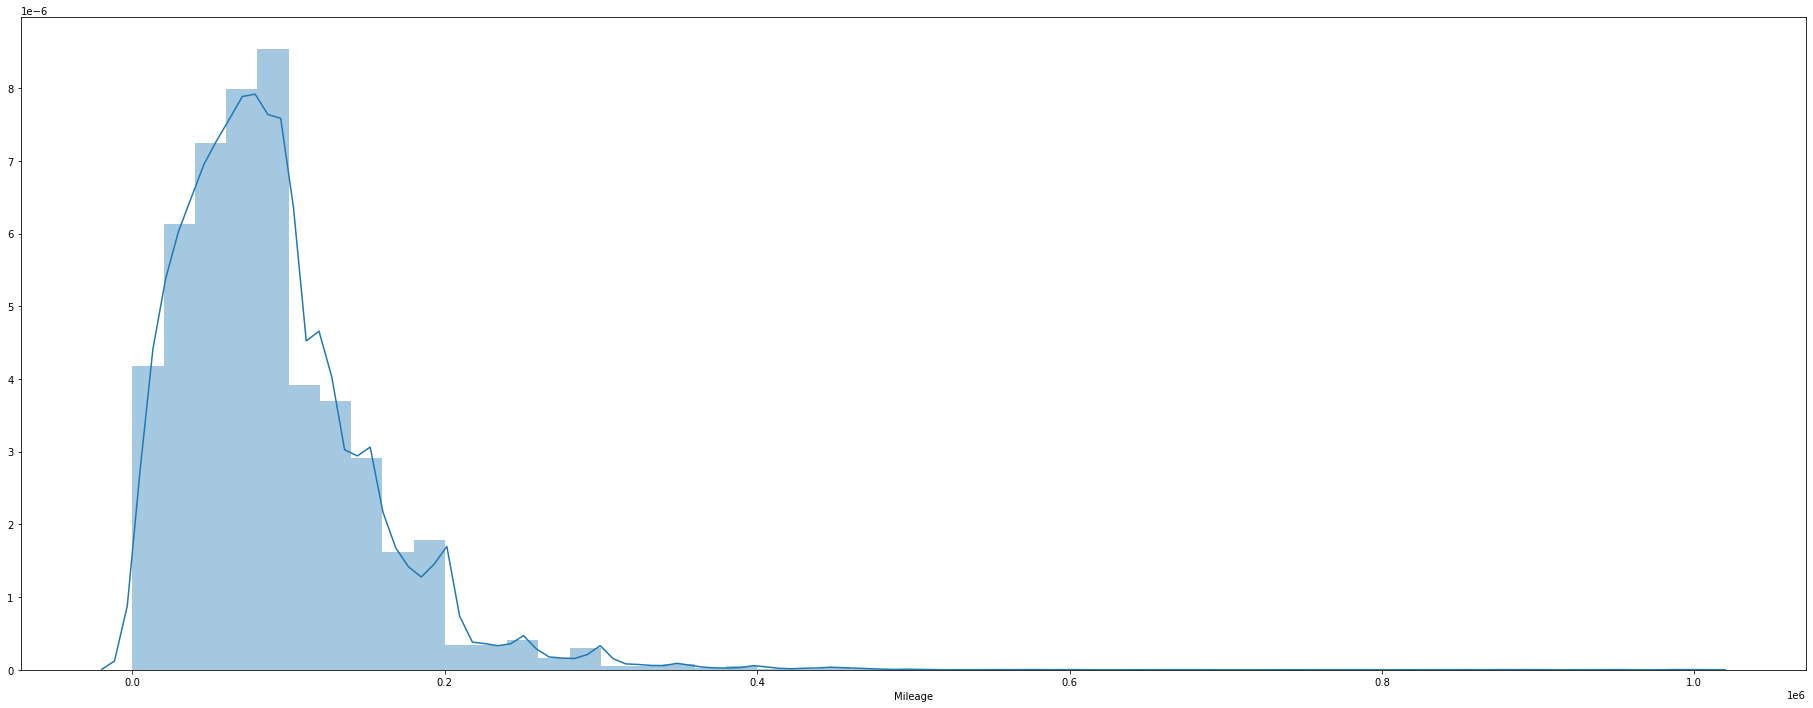

In [53]:
fig, ax = plt.subplots(figsize=(32,12))
sns.distplot(data['Mileage'])

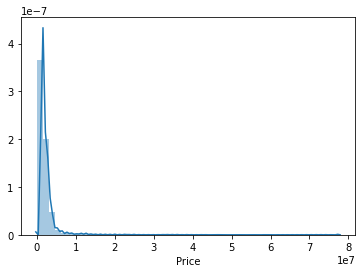

In [268]:
sns.distplot(data['Price'])

<Figure size 1584x432 with 0 Axes>

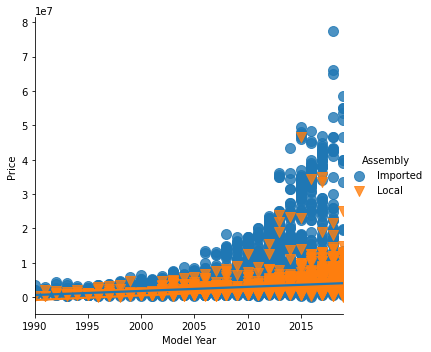

In [20]:
plt.figure(figsize=(22,6))
sns.lmplot(x='Model Year',y='Price',data=data,hue='Assembly',markers=['o','v'],scatter_kws={'s':100})

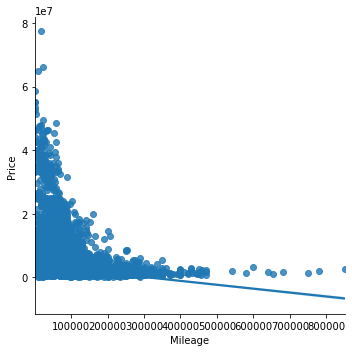

In [22]:
sns.lmplot(x='Mileage',y='Price',data=data)

In [10]:
data['Mileage'].describe()

count     29817.000000
mean      80791.190227
std       53692.217313
min           1.000000
25%       42000.000000
50%       73000.000000
75%      105000.000000
max      850000.000000
Name: Mileage, dtype: float64

In [44]:
data[data['Mileage']==1]

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Company,...,ImmobilizerKey,ABS,Numeric RegCity,Numeric MName,Numeric EType,Numeric ECapacity,Numeric Transmission,Numeric Color,Numeric Assembly,Numeric Company
425,962000.0,2019.0,1.0,Un-Registered,Petrol,1000 cc,Manual,White,Local,Changan,...,0,0,4,77,1,77,0,2,0,4
15369,10500000.0,2019.0,1.0,Un-Registered,Petrol,1600 cc,Automatic,White,Imported,Mercedes,...,ImmobilizerKey,ABS,4,642,1,642,1,2,1,35
18729,1550000.0,2019.0,1.0,Un-Registered,Petrol,660 cc,Automatic,White,Local,Suzuki,...,ImmobilizerKey,ABS,4,956,1,956,1,2,0,50
18826,1565000.0,2019.0,1.0,Un-Registered,Petrol,660 cc,Automatic,White,Local,Suzuki,...,ImmobilizerKey,ABS,4,956,1,956,1,2,0,50
20322,1400000.0,2019.0,1.0,Islamabad,Petrol,660 cc,Manual,Blue,Local,Suzuki,...,ImmobilizerKey,0,3,957,1,957,0,5,0,50
37486,2750000.0,2019.0,1.0,Lahore,Petrol,1500 cc,Automatic,Green,Imported,Toyota,...,ImmobilizerKey,ABS,2,1127,1,1127,1,11,1,51
38483,1000000.0,2011.0,1.0,Karachi,Diesel,1500 cc,Automatic,Blue,Imported,Toyota,...,0,0,0,1165,0,1165,1,5,1,51


In [54]:
data.drop(data[data['Mileage']==1].index,inplace=True)

In [13]:
data[data['Mileage']==1].count()

Price                   0
Model Year              0
Mileage                 0
Registered City         0
Engine Type             0
Engine Capacity         0
Transmission            0
Color                   0
Assembly                0
ABSFeature              0
Company                 0
Model Name              0
Numeric RegCity         0
Numeric EType           0
Numeric ECapacity       0
Numeric Transmission    0
Numeric Color           0
Numeric Assembly        0
Numeric Company         0
dtype: int64

In [15]:
data.head(1000)

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,ABSFeature,Company,Model Name,Numeric RegCity,Numeric EType,Numeric ECapacity,Numeric Transmission,Numeric Color,Numeric Assembly,Numeric Company
4,4495000.0,2015.0,5599.0,Lahore,Petrol,1200 cc,Automatic,Silver,Imported,ABS,Audi,A3 1.2 TFSI,0,0,0,0,0,0,0
5,5700000.0,2017.0,45000.0,Lahore,Petrol,1200 cc,Automatic,White,Local,ABS,Audi,A3 1.2 TFSI,0,0,0,0,1,1,0
6,5700000.0,2017.0,12000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,ABS,Audi,A3 1.2 TFSI,1,0,0,0,1,1,0
7,5700000.0,2017.0,20000.0,Lahore,Petrol,1200 cc,Automatic,Black,Local,ABS,Audi,A3 1.2 TFSI,0,0,0,0,2,1,0
8,6500000.0,2019.0,8000.0,Un-Registered,Petrol,1200 cc,Automatic,White,Imported,ABS,Audi,A3 1.2 TFSI,2,0,0,0,1,0,0
9,4750000.0,2015.0,42000.0,Karachi,Petrol,1200 cc,Automatic,Grey,Local,ABS,Audi,A3 1.2 TFSI Design Line,3,0,1,0,3,1,0
10,6100000.0,2016.0,85000.0,Karachi,Petrol,1200 cc,Automatic,Black,Imported,ABS,Audi,A3 1.2 TFSI Design Line,3,0,1,0,2,0,0
11,5400000.0,2016.0,30000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,ABS,Audi,A3 1.2 TFSI Design Line,1,0,1,0,1,1,0
12,5900000.0,2016.0,42000.0,Islamabad,Petrol,1200 cc,Automatic,White,Imported,ABS,Audi,A3 1.2 TFSI Design Line,1,0,1,0,1,0,0
13,5750000.0,2016.0,38000.0,Islamabad,Petrol,1200 cc,Automatic,White,Imported,ABS,Audi,A3 1.2 TFSI Design Line,1,0,1,0,1,0,0


# Less than 500 Mileage And also not new model

In [29]:
data[(data['Mileage']<=500) &(data['Model Year']<2019)]

Price                   23
Model Year              23
Mileage                 23
Registered City         23
Engine Type             23
Engine Capacity         23
Transmission            23
Color                   23
Assembly                23
ABSFeature              23
Company                 23
Model Name              23
Numeric RegCity         23
Numeric EType           23
Numeric ECapacity       23
Numeric Transmission    23
Numeric Color           23
Numeric Assembly        23
Numeric Company         23
dtype: int64

# Coroola with Lesser Prices

In [36]:
data[data['Price']<=150000]

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,ABSFeature,Company,Model Name,Numeric RegCity,Numeric EType,Numeric ECapacity,Numeric Transmission,Numeric Color,Numeric Assembly,Numeric Company
41085,123000.0,1998.0,123456.0,Islamabad,Petrol,1300 cc,Manual,Gold,Local,ABS,Toyota,Corolla GL,1,0,1088,1,13,1,38
43898,111000.0,2019.0,11111.0,Islamabad,Petrol,1300 cc,Automatic,White,Local,ABS,Toyota,Corolla GLi Automatic 1.3 VVTi,1,0,1094,0,1,1,38


No handles with labels found to put in legend.


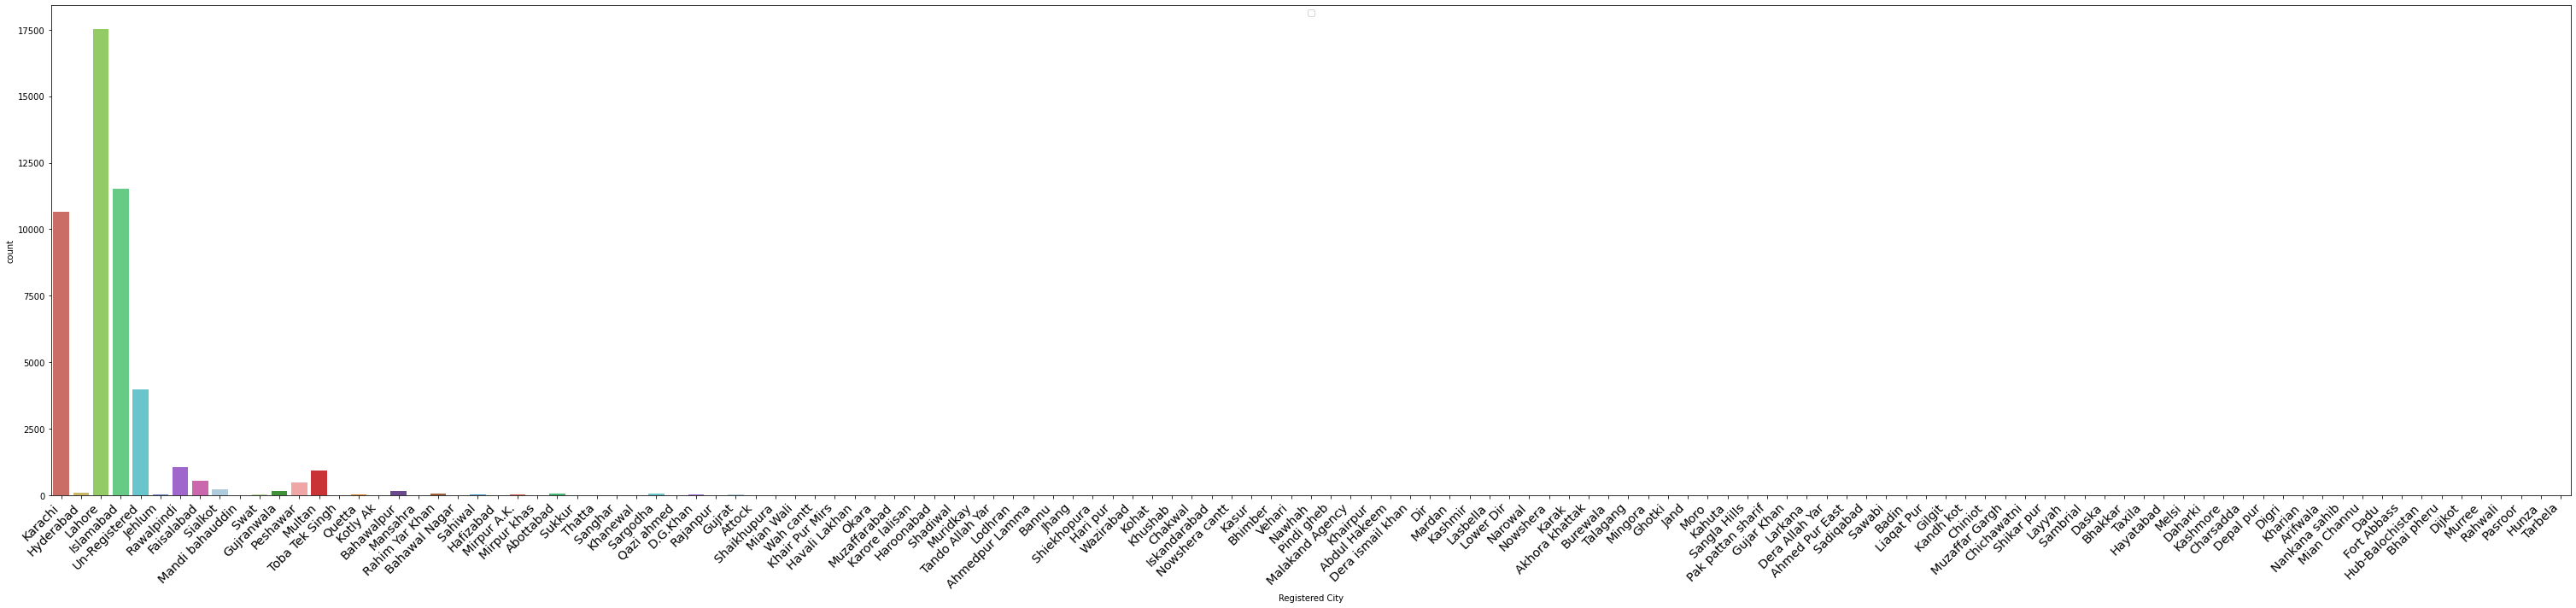

In [50]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(figsize=(42,10))
g=sns.countplot(x='Registered City',data=data,dodge=False,ax=ax,
                  palette=(sns.color_palette("hls", 8) + 
                           sns.color_palette("Paired") + 
                           sns.color_palette(flatui)))
g.legend(loc='upper center', ncol=3)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.tight_layout()

No handles with labels found to put in legend.


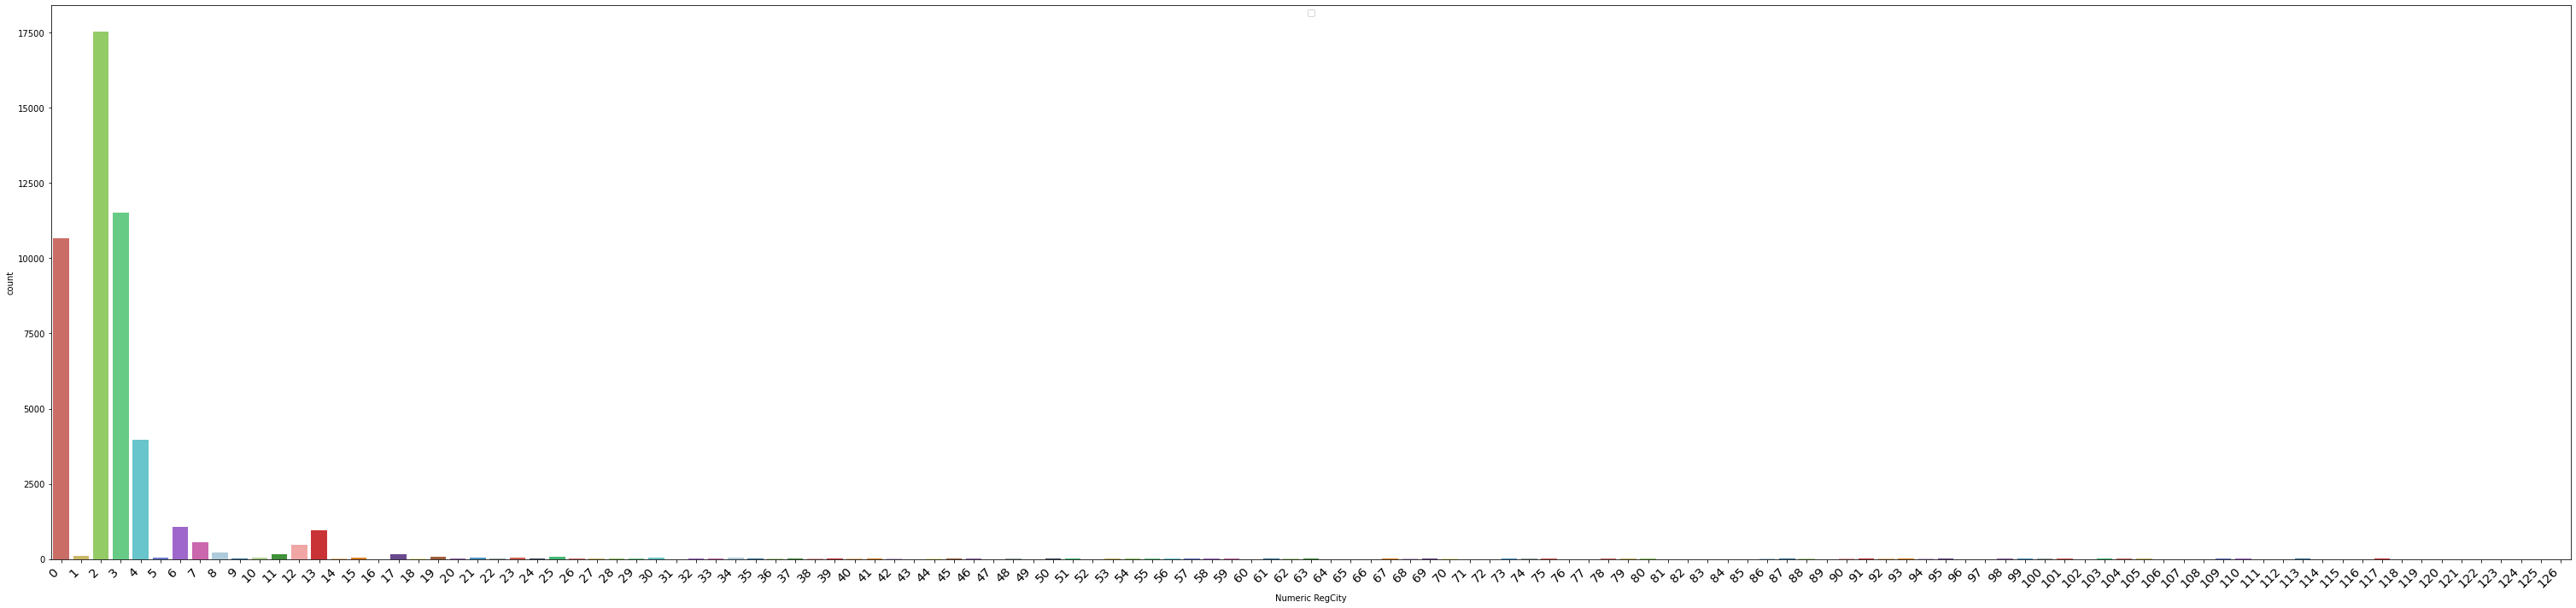

In [51]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(figsize=(42,10))
g=sns.countplot(x='Numeric RegCity',data=data,dodge=False,ax=ax,
                  palette=(sns.color_palette("hls", 8) + 
                           sns.color_palette("Paired") + 
                           sns.color_palette(flatui)))
g.legend(loc='upper center', ncol=3)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.tight_layout()

No handles with labels found to put in legend.


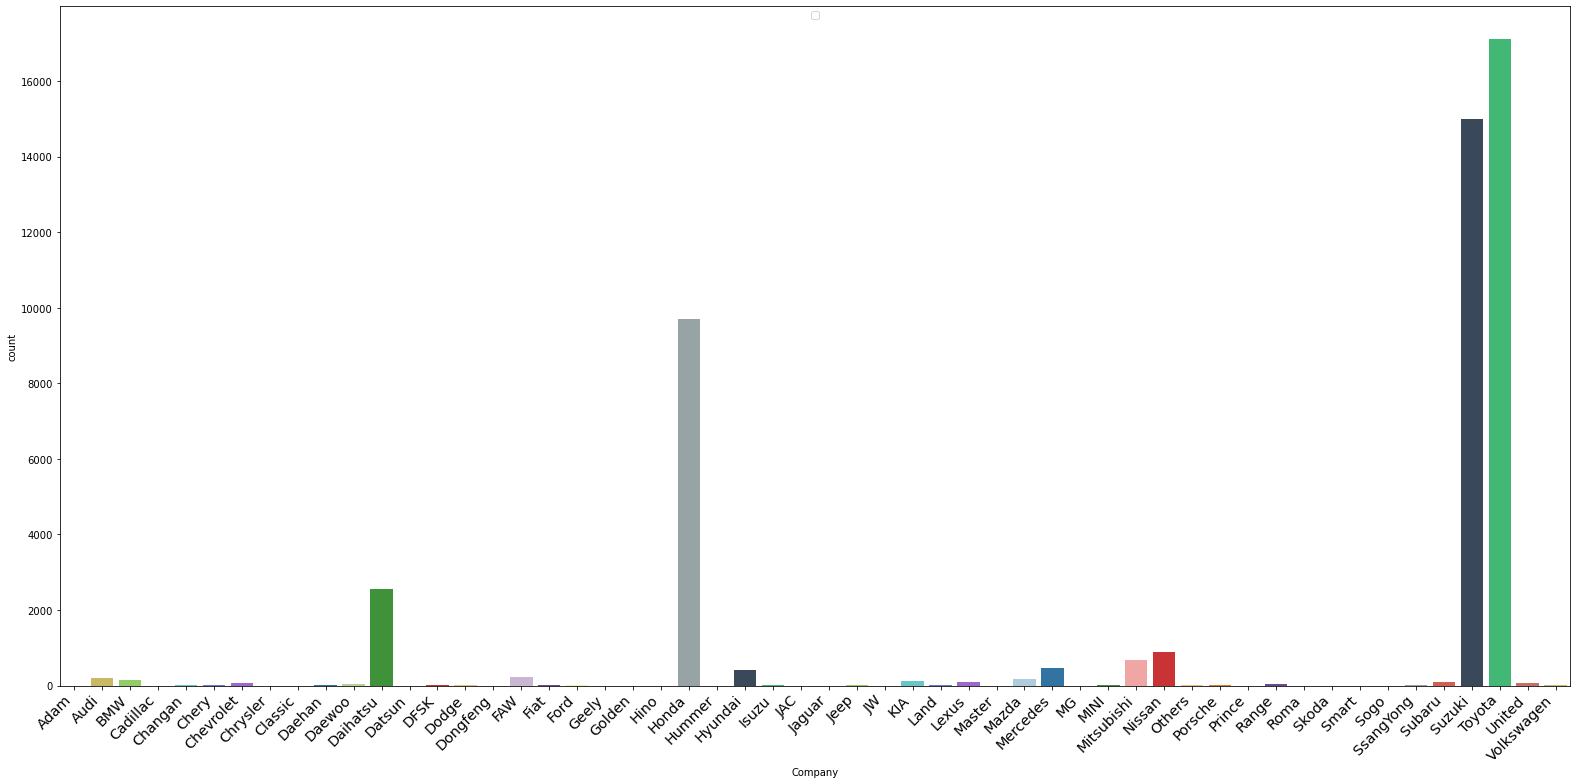

In [56]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(figsize=(22,11))
g=sns.countplot(x='Company',data=data,dodge=False,ax=ax,
                  palette=(sns.color_palette("hls", 8) + 
                           sns.color_palette("Paired") + 
                           sns.color_palette(flatui)))
g.legend(loc='upper center', ncol=3)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.tight_layout()

No handles with labels found to put in legend.


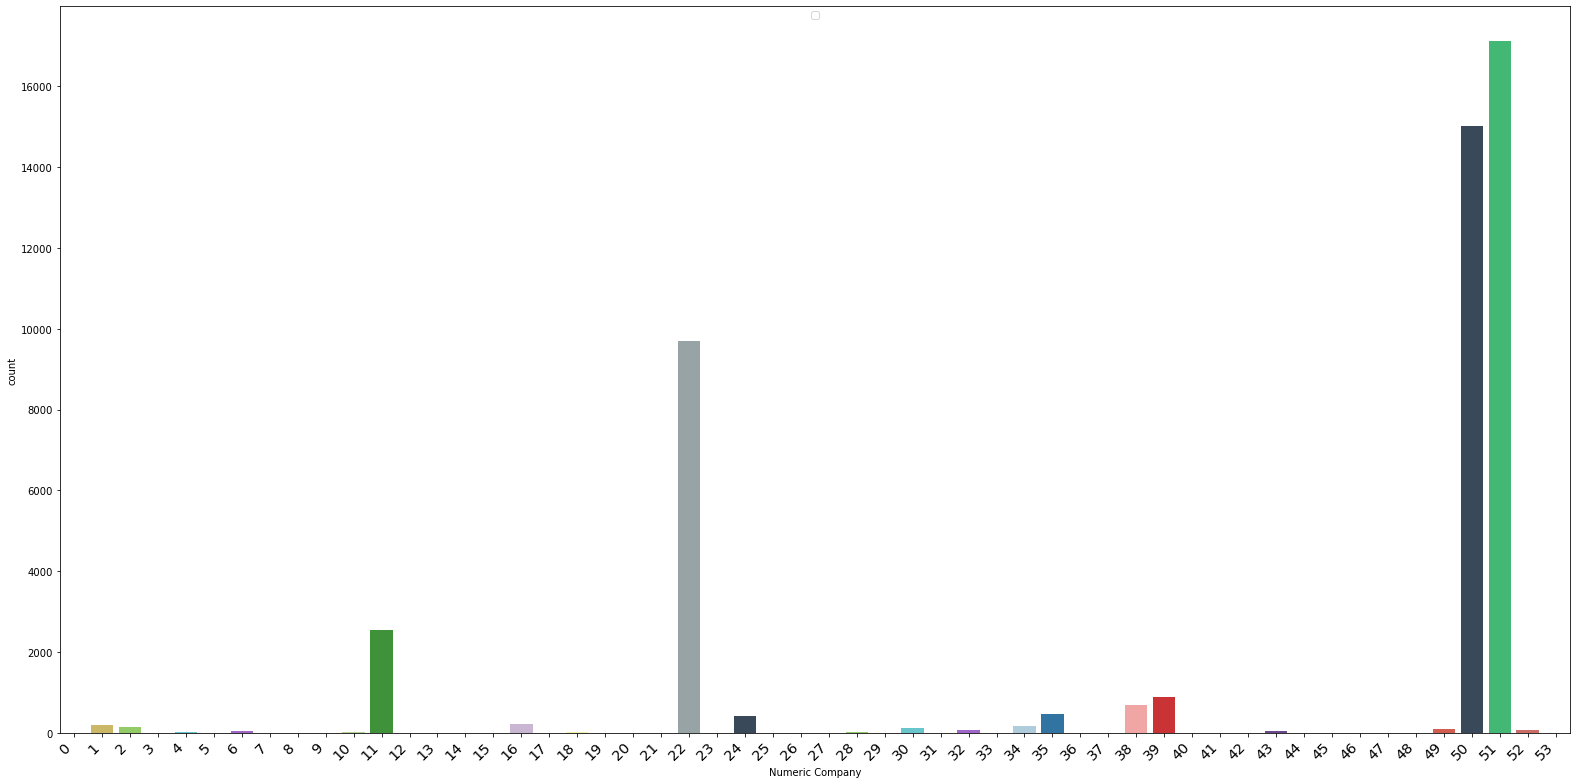

In [57]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(figsize=(22,11))
g=sns.countplot(x='Numeric Company',data=data,dodge=False,ax=ax,
                  palette=(sns.color_palette("hls", 8) + 
                           sns.color_palette("Paired") + 
                           sns.color_palette(flatui)))
g.legend(loc='upper center', ncol=3)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.tight_layout()

No handles with labels found to put in legend.


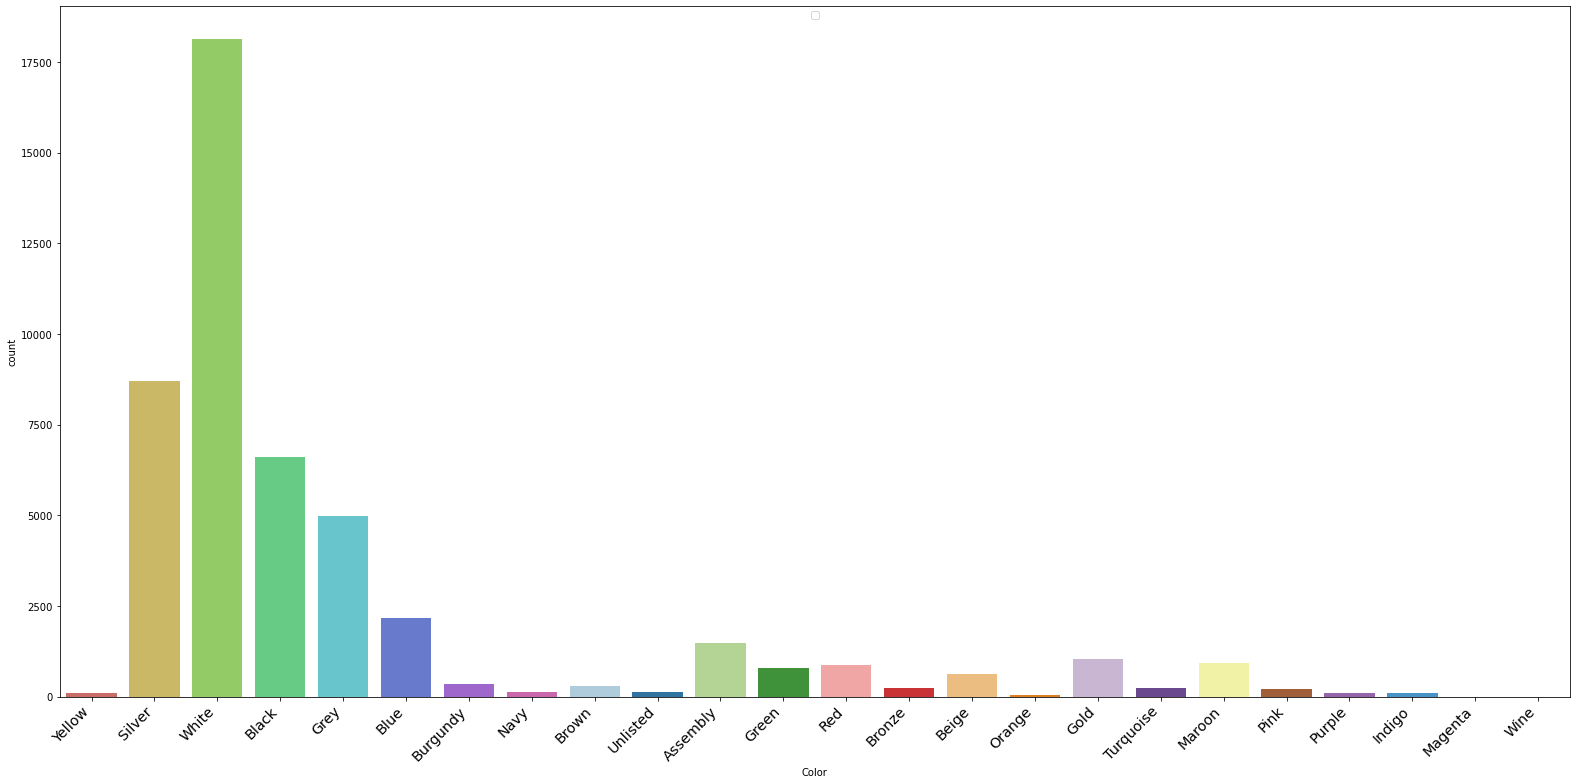

In [60]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(figsize=(22,11))
g=sns.countplot(x='Color',data=data,dodge=False,ax=ax,
                  palette=(sns.color_palette("hls", 8) + 
                           sns.color_palette("Paired") + 
                           sns.color_palette(flatui)))
g.legend(loc='upper center', ncol=3)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.tight_layout()

No handles with labels found to put in legend.


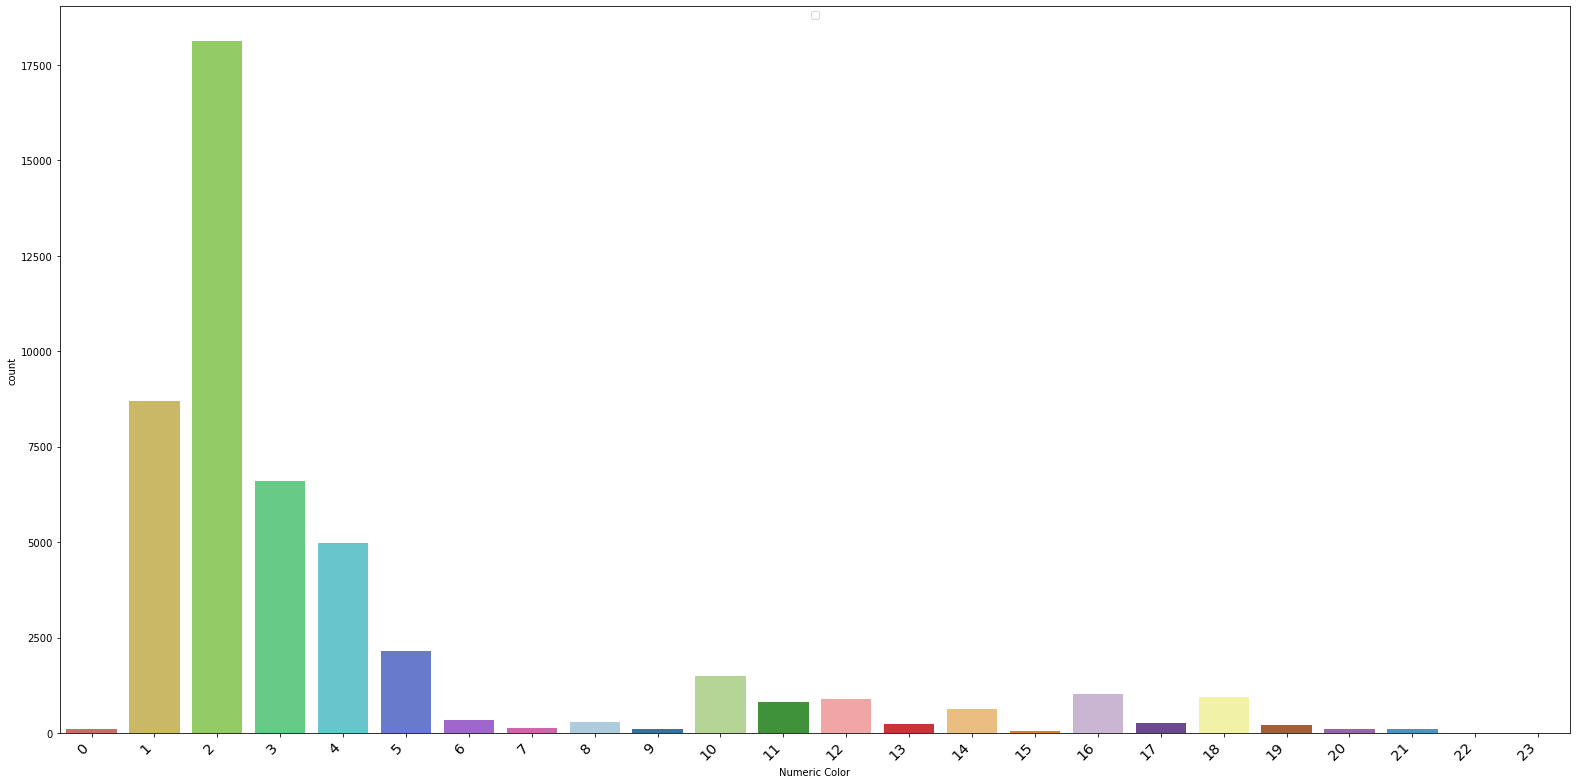

In [61]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, ax = plt.subplots(figsize=(22,11))
g=sns.countplot(x='Numeric Color',data=data,dodge=False,ax=ax,
                  palette=(sns.color_palette("hls", 8) + 
                           sns.color_palette("Paired") + 
                           sns.color_palette(flatui)))
g.legend(loc='upper center', ncol=3)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.tight_layout()

# AIR CONDITIONED

<Figure size 1584x432 with 0 Axes>

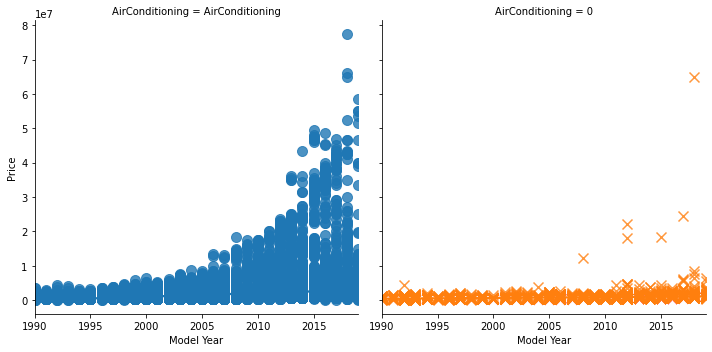

In [76]:
plt.figure(figsize=(22,6))
sns.lmplot(x='Model Year',y='Price',data=data,hue='AirConditioning',markers=['o','x'],scatter_kws={'s':100}
          ,col="AirConditioning")


# ABS

<Figure size 1584x432 with 0 Axes>

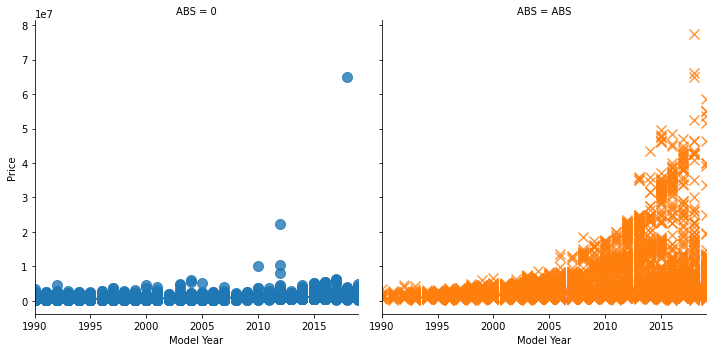

In [77]:
plt.figure(figsize=(22,6))
sns.lmplot(x='Model Year',y='Price',data=data,hue='ABS',markers=['o','x'],scatter_kws={'s':100}
          ,col="ABS")

# POWER LOCKS

<Figure size 1584x432 with 0 Axes>

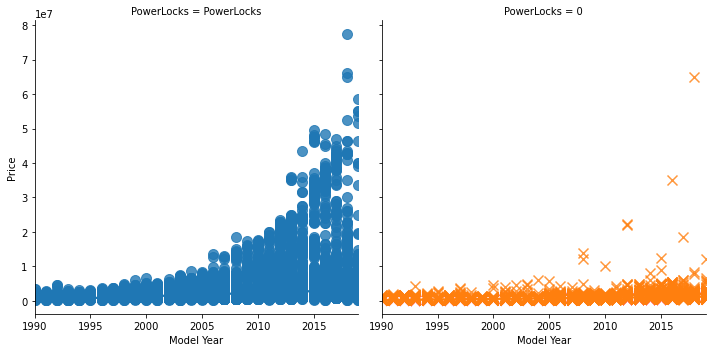

In [81]:
plt.figure(figsize=(22,6))
sns.lmplot(x='Model Year',y='Price',data=data,hue='PowerLocks',markers=['o','x'],scatter_kws={'s':100}
          ,col="PowerLocks")

In [82]:
data[data['PowerLocks']=='PowerLocks'].count()

Price                   36403
Model Year              36403
Mileage                 36403
Registered City         36403
Engine Type             36403
Engine Capacity         36403
Transmission            36403
Color                   36403
Assembly                36403
Company                 36403
Model Name              36403
Features                36403
CruiseControl           36403
AirBags                 36403
AirConditioning         36403
AlloyRims               36403
PowerLocks              36403
PowerSteering           36403
PowerWindows            36403
SunRoof                 36403
PowerMirrors            36403
ImmobilizerKey          36403
ABS                     36403
Numeric RegCity         36403
Numeric MName           36403
Numeric EType           36403
Numeric ECapacity       36403
Numeric Transmission    36403
Numeric Color           36403
Numeric Assembly        36403
Numeric Company         36403
dtype: int64

# AirBags 

<Figure size 1584x432 with 0 Axes>

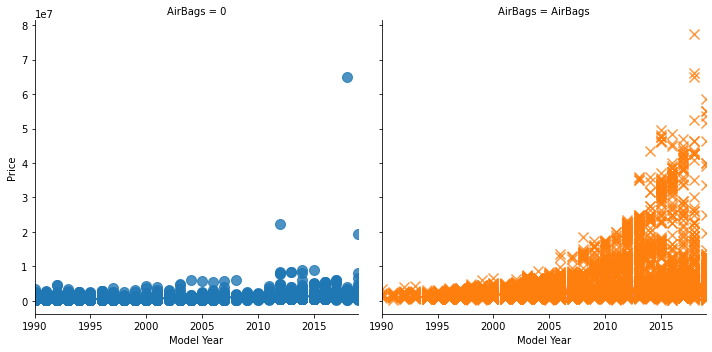

In [85]:
plt.figure(figsize=(22,6))
sns.lmplot(x='Model Year',y='Price',data=data,hue='AirBags',markers=['o','x'],scatter_kws={'s':100}
          ,col="AirBags")

# CruiseControl

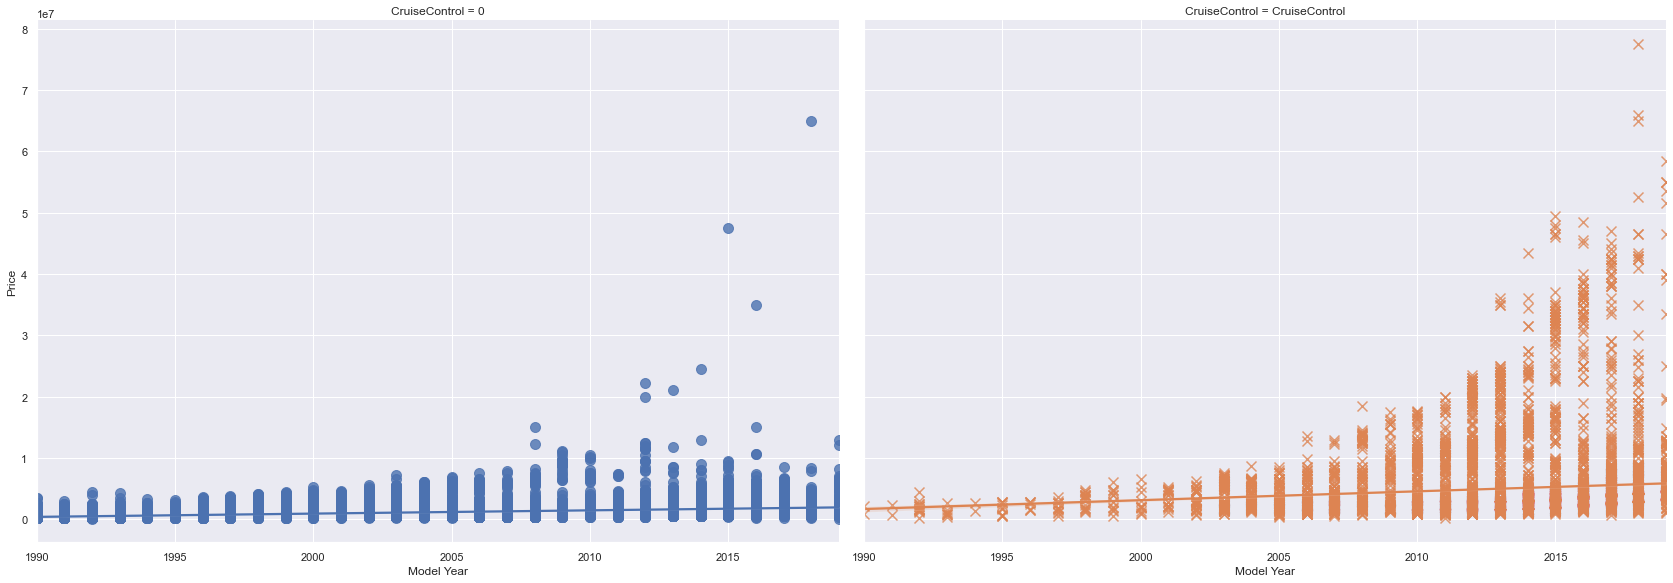

In [96]:

sns.lmplot(x='Model Year',y='Price',data=data,hue='CruiseControl',markers=['o','x'],scatter_kws={'s':100}
          ,col="CruiseControl",height=8.27, aspect=11.7/8.27)

# SunRoff

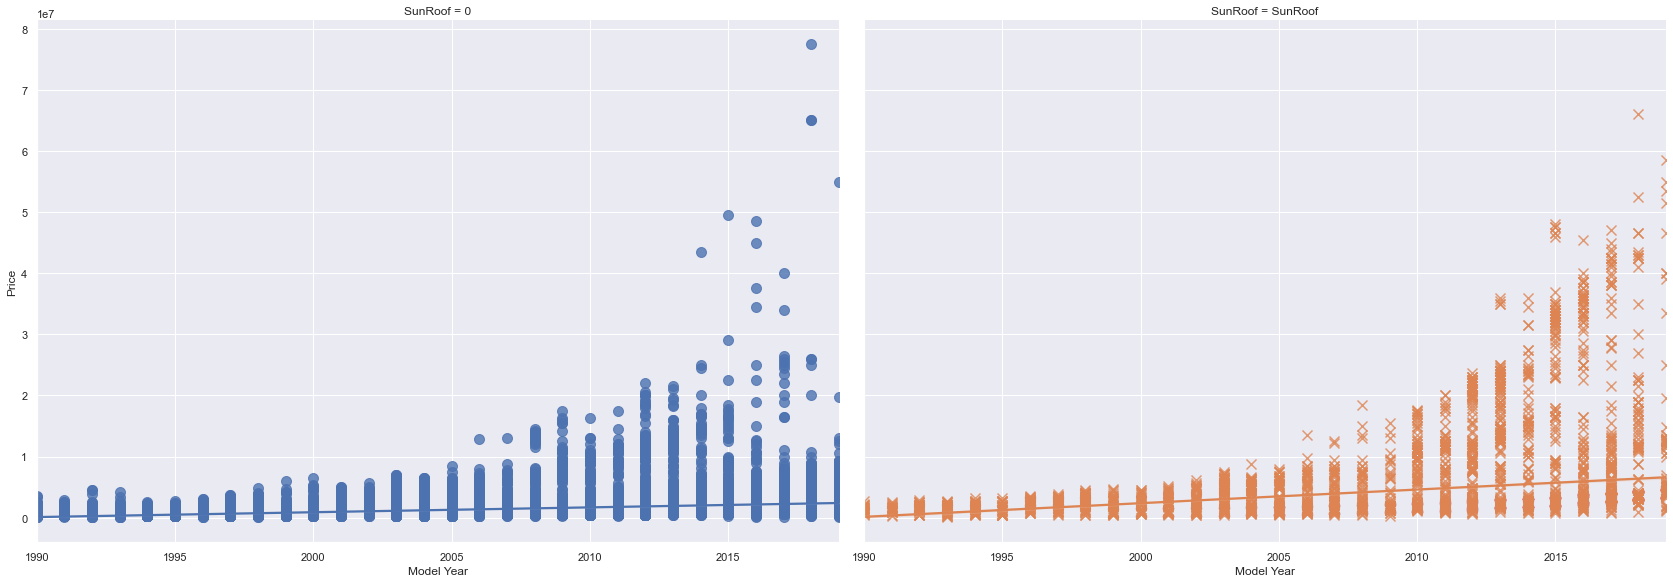

In [97]:

sns.lmplot(x='Model Year',y='Price',data=data,hue='SunRoof',markers=['o','x'],scatter_kws={'s':100}
          ,col="SunRoof",height=8.27, aspect=11.7/8.27)

In [59]:

data.loc[data['ABS'] =='ABS', 'ABS'] = 1

In [60]:
data.head(100)

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Company,...,ImmobilizerKey,ABS,Numeric RegCity,Numeric MName,Numeric EType,Numeric ECapacity,Numeric Transmission,Numeric Color,Numeric Assembly,Numeric Company
2,1000000.0,2009.0,300000.0,Karachi,Diesel,3000 cc,Manual,Yellow,Local,Adam,...,ImmobilizerKey,0,0,0,0,0,0,0,0,0
3,4500000.0,2012.0,36000.0,Hyderabad,Petrol,1000 cc,Manual,Silver,Imported,Audi,...,0,0,1,1,1,1,0,1,1,1
4,4495000.0,2015.0,5599.0,Lahore,Petrol,1200 cc,Automatic,Silver,Imported,Audi,...,ImmobilizerKey,1,2,2,1,2,1,1,1,1
5,5700000.0,2017.0,45000.0,Lahore,Petrol,1200 cc,Automatic,White,Local,Audi,...,ImmobilizerKey,1,2,2,1,2,1,2,0,1
6,5700000.0,2017.0,12000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,ImmobilizerKey,1,3,2,1,2,1,2,0,1
7,5700000.0,2017.0,20000.0,Lahore,Petrol,1200 cc,Automatic,Black,Local,Audi,...,ImmobilizerKey,1,2,2,1,2,1,3,0,1
8,6500000.0,2019.0,8000.0,Un-Registered,Petrol,1200 cc,Automatic,White,Imported,Audi,...,ImmobilizerKey,1,4,2,1,2,1,2,1,1
9,4750000.0,2015.0,42000.0,Karachi,Petrol,1200 cc,Automatic,Grey,Local,Audi,...,ImmobilizerKey,1,0,3,1,3,1,4,0,1
10,6100000.0,2016.0,85000.0,Karachi,Petrol,1200 cc,Automatic,Black,Imported,Audi,...,ImmobilizerKey,1,0,3,1,3,1,3,1,1
11,5400000.0,2016.0,30000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,ImmobilizerKey,1,3,3,1,3,1,2,0,1


In [62]:

data.loc[data['ImmobilizerKey'] =='ImmobilizerKey', 'ImmobilizerKey'] = 1

data.loc[data['CruiseControl'] =='CruiseControl', 'CruiseControl'] = 1

data.loc[data['SunRoof'] =='SunRoof', 'SunRoof'] = 1

data.loc[data['AirBags'] =='AirBags', 'AirBags'] = 1

data.loc[data['AirConditioning'] =='AirConditioning', 'AirConditioning'] = 1

data.loc[data['AlloyRims'] =='AlloyRims', 'AlloyRims'] = 1

data.loc[data['PowerLocks'] =='PowerLocks', 'PowerLocks'] = 1

data.loc[data['PowerMirrors'] =='PowerMirrors', 'PowerMirrors'] = 1

data.loc[data['PowerSteering'] =='PowerSteering', 'PowerSteering'] = 1

data.loc[data['PowerWindows'] =='PowerWindows', 'PowerWindows'] = 1

In [63]:
data.head(100)

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Company,...,ImmobilizerKey,ABS,Numeric RegCity,Numeric MName,Numeric EType,Numeric ECapacity,Numeric Transmission,Numeric Color,Numeric Assembly,Numeric Company
2,1000000.0,2009.0,300000.0,Karachi,Diesel,3000 cc,Manual,Yellow,Local,Adam,...,1,0,0,0,0,0,0,0,0,0
3,4500000.0,2012.0,36000.0,Hyderabad,Petrol,1000 cc,Manual,Silver,Imported,Audi,...,0,0,1,1,1,1,0,1,1,1
4,4495000.0,2015.0,5599.0,Lahore,Petrol,1200 cc,Automatic,Silver,Imported,Audi,...,1,1,2,2,1,2,1,1,1,1
5,5700000.0,2017.0,45000.0,Lahore,Petrol,1200 cc,Automatic,White,Local,Audi,...,1,1,2,2,1,2,1,2,0,1
6,5700000.0,2017.0,12000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,1,1,3,2,1,2,1,2,0,1
7,5700000.0,2017.0,20000.0,Lahore,Petrol,1200 cc,Automatic,Black,Local,Audi,...,1,1,2,2,1,2,1,3,0,1
8,6500000.0,2019.0,8000.0,Un-Registered,Petrol,1200 cc,Automatic,White,Imported,Audi,...,1,1,4,2,1,2,1,2,1,1
9,4750000.0,2015.0,42000.0,Karachi,Petrol,1200 cc,Automatic,Grey,Local,Audi,...,1,1,0,3,1,3,1,4,0,1
10,6100000.0,2016.0,85000.0,Karachi,Petrol,1200 cc,Automatic,Black,Imported,Audi,...,1,1,0,3,1,3,1,3,1,1
11,5400000.0,2016.0,30000.0,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,1,1,3,3,1,3,1,2,0,1


# Normalization

In [221]:
scalling=MinMaxScaler()
norm=scalling.fit_transform(data[['Numeric Company','Numeric Assembly ','Numeric Color','Numeric Transmission','Numeric ECapacity','Numeric EType',
                'Numeric MName','Numeric RegCity','Model Year','Mileage']])
data[['Numeric Company','Numeric Assembly ','Numeric Color','Numeric Transmission','Numeric ECapacity','Numeric EType',
                'Numeric MName','Numeric RegCity','Model Year','Mileage']]=norm

In [222]:
data

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Company,...,ImmobilizerKey,ABS,Numeric RegCity,Numeric MName,Numeric EType,Numeric ECapacity,Numeric Transmission,Numeric Color,Numeric Assembly,Numeric Company
2,1000000.0,0.655172,0.299999,Karachi,Diesel,3000 cc,Manual,Yellow,Local,Adam,...,1,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,4500000.0,0.758621,0.035998,Hyderabad,Petrol,1000 cc,Manual,Silver,Imported,Audi,...,0,0,0.007937,0.000629,0.5,0.000629,0.0,0.043478,1.0,0.018868
4,4495000.0,0.862069,0.005597,Lahore,Petrol,1200 cc,Automatic,Silver,Imported,Audi,...,1,1,0.015873,0.001258,0.5,0.001258,1.0,0.043478,1.0,0.018868
5,5700000.0,0.931034,0.044998,Lahore,Petrol,1200 cc,Automatic,White,Local,Audi,...,1,1,0.015873,0.001258,0.5,0.001258,1.0,0.086957,0.0,0.018868
6,5700000.0,0.931034,0.011998,Islamabad,Petrol,1200 cc,Automatic,White,Local,Audi,...,1,1,0.023810,0.001258,0.5,0.001258,1.0,0.086957,0.0,0.018868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,3000000.0,0.793103,0.077998,Islamabad,Petrol,1200 cc,Automatic,White,Imported,Volkswagen,...,0,1,0.023810,0.999371,0.5,0.999371,1.0,0.086957,1.0,1.000000
54478,2075000.0,0.827586,0.098998,Islamabad,Petrol,1000 cc,Automatic,Black,Imported,Volkswagen,...,1,1,0.023810,1.000000,0.5,1.000000,1.0,0.130435,1.0,1.000000
54479,2250000.0,0.827586,0.056998,Karachi,Petrol,1000 cc,Automatic,White,Imported,Volkswagen,...,0,0,0.000000,1.000000,0.5,1.000000,1.0,0.086957,1.0,1.000000
54480,1550000.0,0.862069,0.031998,Lahore,Petrol,1000 cc,Automatic,Silver,Imported,Volkswagen,...,1,1,0.015873,1.000000,0.5,1.000000,1.0,0.043478,1.0,1.000000


In [234]:
X=data[['Numeric Company','Numeric Assembly ','Numeric Color','Numeric Transmission','Numeric ECapacity','Numeric EType','Numeric MName','Numeric RegCity','Model Year','Mileage']]
y=data['Price']

In [284]:

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.4, random_state=101)

model=DecisionTreeClassifier()
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Predictions

In [287]:
predictions=lm.predict(X_test)
predictions

array([-165832.42888404, 1668265.51033211,  329737.19247071, ...,
       1187708.0473618 , 2910123.89756919,  679839.89604216])

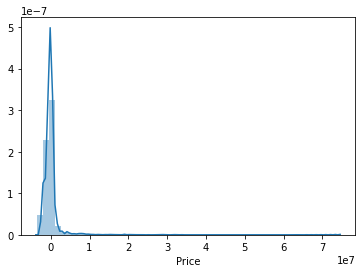

In [291]:
sns.distplot((y_test-predictions))

# Linear Regressions

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48255 entries, 2 to 54481
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 48255 non-null  float64
 1   Model Year            48255 non-null  float64
 2   Mileage               48255 non-null  float64
 3   Registered City       48255 non-null  object 
 4   Engine Type           48255 non-null  object 
 5   Engine Capacity       48255 non-null  object 
 6   Transmission          48255 non-null  object 
 7   Color                 48255 non-null  object 
 8   Assembly              48255 non-null  object 
 9   Company               48255 non-null  object 
 10  Model Name            48255 non-null  object 
 11  Features              48255 non-null  object 
 12  CruiseControl         48255 non-null  object 
 13  AirBags               48255 non-null  object 
 14  AirConditioning       48255 non-null  object 
 15  AlloyRims          

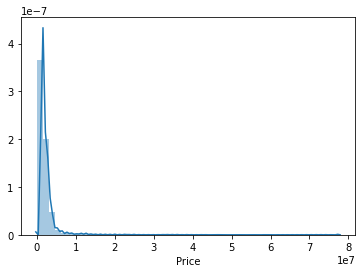

In [274]:
sns.distplot(data['Price'])

In [276]:
data[data['Price']>=1000000].count()

Price                   35000
Model Year              35000
Mileage                 35000
Registered City         35000
Engine Type             35000
Engine Capacity         35000
Transmission            35000
Color                   35000
Assembly                35000
Company                 35000
Model Name              35000
Features                35000
CruiseControl           35000
AirBags                 35000
AirConditioning         35000
AlloyRims               35000
PowerLocks              35000
PowerSteering           35000
PowerWindows            35000
SunRoof                 35000
PowerMirrors            35000
ImmobilizerKey          35000
ABS                     35000
Numeric RegCity         35000
Numeric MName           35000
Numeric EType           35000
Numeric ECapacity       35000
Numeric Transmission    35000
Numeric Color           35000
Numeric Assembly        35000
Numeric Company         35000
dtype: int64